# Data Analysis

### 1. Loading Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### 2. Import Data

In [39]:
###################################################
###### Import Data: Read the main file from AWS S3
###################################################

# path_file = 'TFM/crime_philadelphia_20062019.csv'

# # To Read files from AWS S3
# import boto3
# import io
# s3 = boto3.client('s3')

# obj = s3.get_object(Bucket='data-eml', Key=path_file)

# data = pd.read_csv(io.BytesIO(obj['Body'].read()))


data = pd.read_csv('../data/CSV/crime_philadelphia_20062019.csv')

# Select Columns
data = data[['dispatch_date','dispatch_time','dc_dist','psa','location_block','ucr_general','text_general_code','point_x','point_y']]
# Parse Dates
data['dispatch_date'] = pd.to_datetime(data['dispatch_date'])
# Select Index
#data.set_index('dispatch_date',drop=True,inplace=True)
# Drop Wrong Distrcits
df = data[(data['dc_dist']!=4)|(data['dc_dist']!=23)|(data['dc_dist']!=92)]
# Rename dc_dist
df.rename(columns={'dc_dist':'DISTRICT_'},inplace=True)
df['DISTRICT_'] = df['DISTRICT_'].astype('str')
# Show head
df.head()

,dispatch_date,dispatch_time,DISTRICT_,psa,location_block,ucr_general,text_general_code,point_x,point_y
0,2015-12-17,07:26:00,1,1,1800 BLOCK S CHADWICK ST,1400.0,Vandalism/Criminal Mischief,-75.173172,39.928303
1,2015-12-17,11:04:00,1,1,1500 BLOCK MC KEAN ST,1400.0,Vandalism/Criminal Mischief,-75.172603,39.925975
2,2015-12-18,22:55:00,1,1,2200 BLOCK S 17TH ST,1400.0,Vandalism/Criminal Mischief,-75.175081,39.922675
3,2015-12-19,00:54:00,1,1,2200 BLOCK S 17TH ST,1400.0,Vandalism/Criminal Mischief,-75.174745,39.923722
4,2015-12-20,01:07:00,1,1,S 16TH ST / MC KEAN ST,1400.0,Vandalism/Criminal Mischief,-75.172683,39.926027


In [40]:
###################################################
###### Import Spatial Data
###################################################
import geopandas as gpd

path_geojson = '../data/geodata/Boundaries_District.geojson'
geodf = gpd.read_file(path_geojson)
geodf['DISTRICT_'] = geodf['DISTRICT_'].astype('str')
geodf.head()

,OBJECTID,AREA,PERIMETER,DISTRICT_,DISTRICT_ID,DIST_NUM,SUM_AREA,DIST_NUMC,LOCATION,PHONE,DIV_CODE,AREA_SQMI,geometry
0,321,None,81903.641825,1,None,1,None,01,24th St. & Wolf St.,686-3010,SPD,2.163501e+08,"POLYGON ((-75.1972400674602 39.9294369069777, ..."
1,322,None,63587.369399,2,None,2,None,02,Harbison Ave. & Levick St.,686-3020,NEPD,1.923461e+08,"POLYGON ((-75.0544438272491 40.0445408366907, ..."
2,323,None,55305.496227,3,None,3,None,03,11th St. & Wharton St.,686-3030,SPD,1.839049e+08,"POLYGON ((-75.1320532000924 39.8993215193001, ..."
3,324,None,71919.797243,5,None,5,None,05,Ridge Ave. & Cinnaminson St.,686-3050,NWPD,2.130442e+08,"POLYGON ((-75.20429961961899 40.0346782025741,..."
4,325,None,34655.320856,6,None,6,None,06,11th St. & Winter St.,686-3060,CPD,6.927927e+07,"POLYGON ((-75.1343658526971 39.9529396074571, ..."


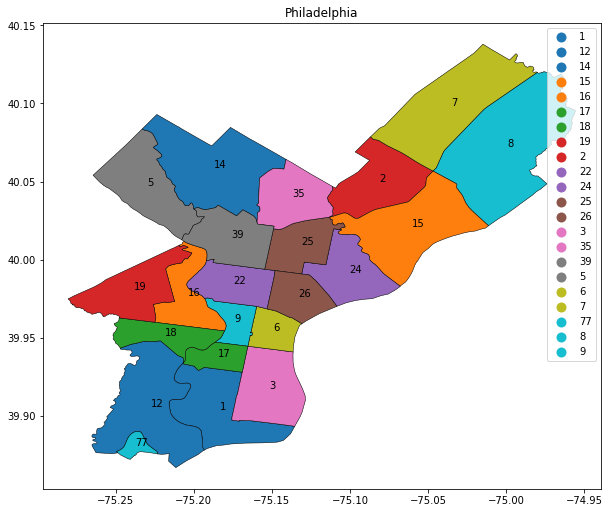

In [41]:
###################################################
###### Plot Districts
###################################################
ax = geodf.plot(column='DISTRICT_',linewidth=0.5,edgecolor='black', legend=True,figsize=(10,10))
for i, geo in geodf.centroid.iteritems():
    ax.annotate(s=geodf['DISTRICT_'][i], xy=[geo.x, geo.y], color="black")

    # show the subplot
    ax.figure
plt.title('Philadelphia')
plt.show();

### 3. Crimes per District

##### 3.1 Type of Crime per District: City

In [60]:
df['text_general_code'].value_counts().head(10)

All Other Offenses                496267
Other Assaults                    328374
Thefts                            307713
Vandalism/Criminal Mischief       232328
Theft from Vehicle                200185
Narcotic / Drug Law Violations    158365
Fraud                             140102
Recovered Stolen Motor Vehicle    111871
Burglary Residential              104961
Aggravated Assault No Firearm      80379
Name: text_general_code, dtype: int64

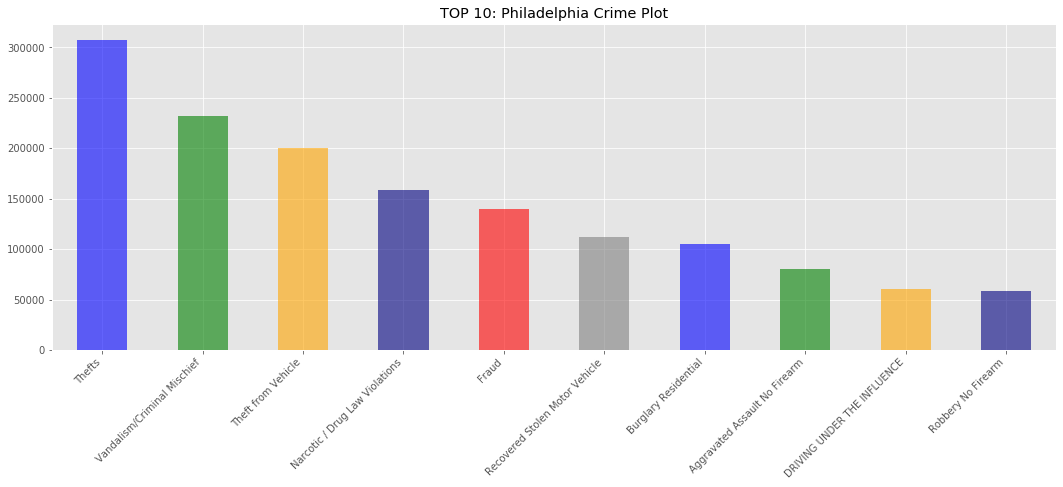

In [88]:
city_crimes = df[(df['text_general_code'] != 'All Other Offenses')&(df['text_general_code'] != 'Other Assaults')]['text_general_code']
city_crimes.value_counts().head(10).plot(kind='bar',color=['blue','green','orange','navy','red','grey'],alpha=0.6,figsize=(18,6))
plt.title('TOP 10: Philadelphia Crime Plot')
plt.xticks(rotation=45,ha='right');

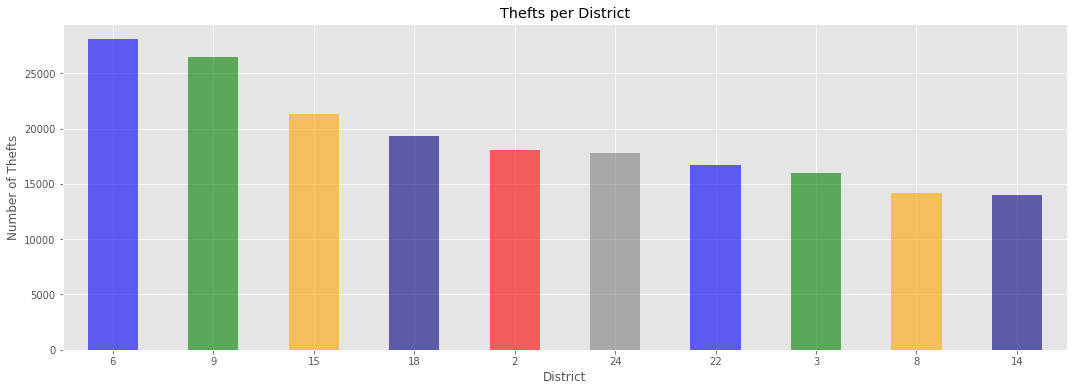

In [94]:
thefts = df[df['text_general_code'] == 'Thefts']
thefts.groupby('DISTRICT_')['text_general_code'].count().sort_values(ascending=False).head(10).plot(kind='bar',color=['blue','green','orange','navy','red','grey'],alpha=0.6,figsize=(18,6))
plt.title('Thefts per District')
plt.xlabel('District')
plt.ylabel('Number of Thefts')
plt.xticks(rotation=0);

___Most of the Thefts in Philadelphia take place in districts 6 and 9. It makes sense because it's the city center.___

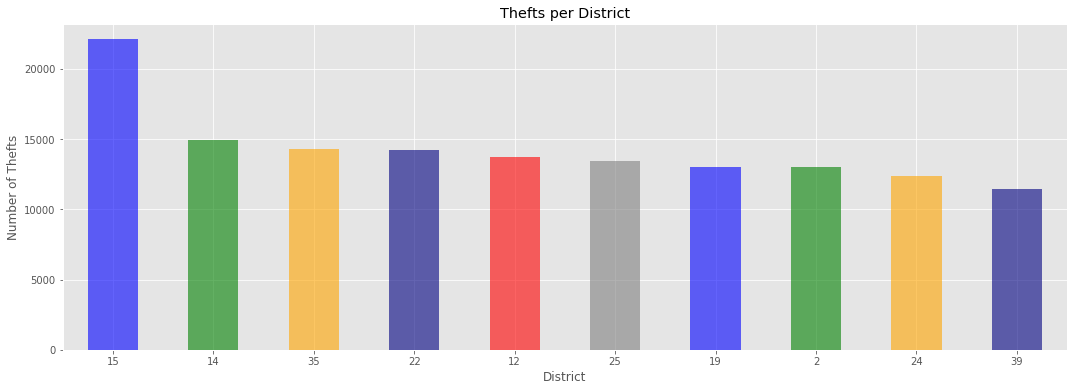

In [98]:
Vandalism = df[df['text_general_code'] == 'Vandalism/Criminal Mischief']
Vandalism.groupby('DISTRICT_')['text_general_code'].count().sort_values(ascending=False).head(10).plot(kind='bar',color=['blue','green','orange','navy','red','grey'],alpha=0.6,figsize=(18,6))
plt.title('Thefts per District')
plt.xlabel('District')
plt.ylabel('Number of Thefts')
plt.xticks(rotation=0);

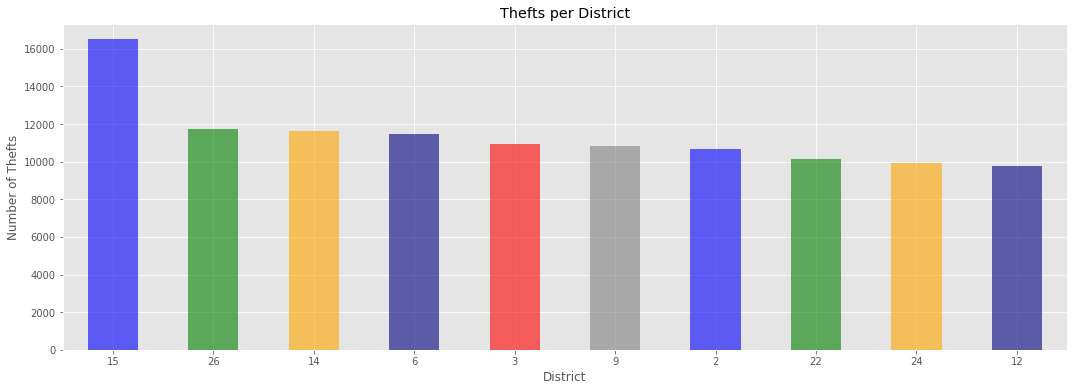

In [97]:
thefts2 = df[df['text_general_code'] == 'Theft from Vehicle']
thefts2.groupby('DISTRICT_')['text_general_code'].count().sort_values(ascending=False).head(10).plot(kind='bar',color=['blue','green','orange','navy','red','grey'],alpha=0.6,figsize=(18,6))
plt.title('Thefts per District')
plt.xlabel('District')
plt.ylabel('Number of Thefts')
plt.xticks(rotation=0);

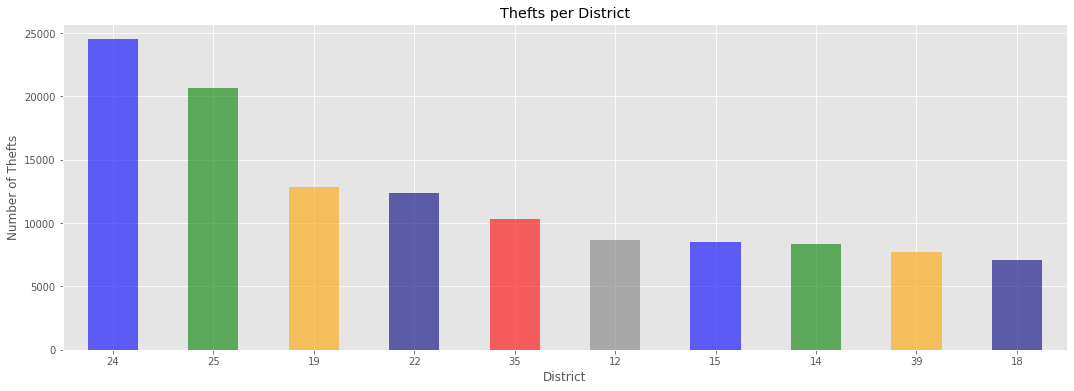

In [99]:
Narcotic = df[df['text_general_code'] == 'Narcotic / Drug Law Violations']
Narcotic.groupby('DISTRICT_')['text_general_code'].count().sort_values(ascending=False).head(10).plot(kind='bar',color=['blue','green','orange','navy','red','grey'],alpha=0.6,figsize=(18,6))
plt.title('Thefts per District')
plt.xlabel('District')
plt.ylabel('Number of Thefts')
plt.xticks(rotation=0);